In [1]:
%pylab inline
import numpy as np
import pandas as pd
import pylab
import matplotlib.pyplot as plt
import scipy as sp
import glob
from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


In [4]:
prefx = 'cal4_tower_' # prefix for the gw calibration you want to analyze

# load the gw calibration parameters used
gw1 = np.load('/RHESSys/Comocreek/barnhatb/out/cal/'+prefx+'gw1.npy')
gw2 = np.load('/RHESSys/Comocreek/barnhatb/out/cal/'+prefx+'gw2.npy')
m = np.load('/RHESSys/Comocreek/barnhatb/out/cal/'+prefx+'m.npy')
ksat = np.load('/RHESSys/Comocreek/barnhatb/out/cal/'+prefx+'ksat.npy')

In [5]:
obs = pd.read_csv('/RHESSys/Comocreek/barnhatb/obs/como_discharge_real_clean.csv', sep=',', header='infer')              

In [6]:
obs.index = pd.date_range(start='2004-01-01',freq='D', periods = len(obs.q_liter_per_day))

In [7]:
obs = obs.drop(['year','doy'], axis = 1)

# Convert Observed Streamflow from L/d to mm/d

In [8]:
area = 5.15*(1000.*1000.) # m^2 area upstream of the gauge

In [9]:
streamflow = obs.q_liter_per_day

In [10]:
streamflow = streamflow*0.001 # convert to m3/d

In [11]:
streamflow = streamflow/area # covert to m/d

In [12]:
obs['discharge'] = streamflow*1000 # convert to mm/d

In [13]:
del streamflow

In [59]:
obs2 = obs.groupby(lambda x: x.year).sum() # generate yearly sums

obstrain = obs.discharge['2004-10-01':'2012-09-30'] # pull out the training years of observations

### Calculate Weekly data

In [15]:
obs3 = obs.resample('W', how='sum')

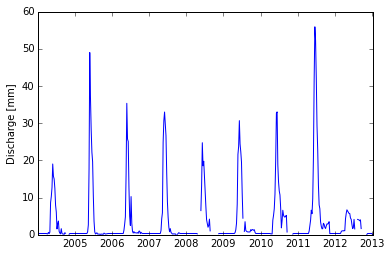

In [16]:
plt.plot(obs3.index, obs3.discharge, 'b-')
plt.ylabel('Discharge [mm]')
plt.show()

# Load ET from AFX

In [17]:
files = glob.glob('/Users/barnhatb/Theo/Volumes/Users/Theo/greenness_timing/ameriflux/niwot/AMF_USNR1_*_L2_GF_V007_tbb.csv')


n = len(files)
files

['/Users/barnhatb/Theo/Volumes/Users/Theo/greenness_timing/ameriflux/niwot/AMF_USNR1_2001_L2_GF_V007_tbb.csv',
 '/Users/barnhatb/Theo/Volumes/Users/Theo/greenness_timing/ameriflux/niwot/AMF_USNR1_2002_L2_GF_V007_tbb.csv',
 '/Users/barnhatb/Theo/Volumes/Users/Theo/greenness_timing/ameriflux/niwot/AMF_USNR1_2003_L2_GF_V007_tbb.csv',
 '/Users/barnhatb/Theo/Volumes/Users/Theo/greenness_timing/ameriflux/niwot/AMF_USNR1_2004_L2_GF_V007_tbb.csv',
 '/Users/barnhatb/Theo/Volumes/Users/Theo/greenness_timing/ameriflux/niwot/AMF_USNR1_2005_L2_GF_V007_tbb.csv',
 '/Users/barnhatb/Theo/Volumes/Users/Theo/greenness_timing/ameriflux/niwot/AMF_USNR1_2006_L2_GF_V007_tbb.csv',
 '/Users/barnhatb/Theo/Volumes/Users/Theo/greenness_timing/ameriflux/niwot/AMF_USNR1_2007_L2_GF_V007_tbb.csv',
 '/Users/barnhatb/Theo/Volumes/Users/Theo/greenness_timing/ameriflux/niwot/AMF_USNR1_2008_L2_GF_V007_tbb.csv',
 '/Users/barnhatb/Theo/Volumes/Users/Theo/greenness_timing/ameriflux/niwot/AMF_USNR1_2009_L2_GF_V007_tbb.csv',
 

In [18]:
fl = files[0]
year = int(fl.split('_')[3])

cols = ['YEAR', 'GAP', 'DTIME', 'DOY', 'HRMIN', 'UST', 'TA', 'WD', 'WS', 'NEE',
        'FC', 'SFC', 'H', 'SH', 'LE', 'SLE', 'FG', 'TS1', 'TSdepth1', 'TS2',
        'TSdepth2', 'PREC', 'RH', 'PRESS', 'CO2', 'VPD', 'SWC1', 'SWC2', 'Rn',
        'PAR', 'Rg', 'Rgdif', 'PARout', 'RgOut', 'Rgl', 'RglOut', 'H2O', 'RE',
        'GPP', 'CO2top', 'CO2height', 'APAR', 'PARdif', 'APARpct', 'ZL']

afx = pd.read_csv(fl, header='infer')
afx.columns = cols
afx.index = pd.date_range(start=str(year)+'-01-01',freq = '30min', periods=len(afx))

In [19]:
for i in xrange(1,n):
    fl = files[i]
    year = int(fl.split('_')[3])

    data = pd.read_csv(fl, header='infer')
    data.index = pd.date_range(start=str(year)+'-01-01',freq = '30min', periods=len(data))
    data.columns = cols
    afx = pd.concat([afx,data])

In [20]:
afx = afx.sort_index()

In [21]:
afx.tail()

,YEAR,GAP,DTIME,DOY,HRMIN,UST,TA,WD,WS,NEE,...,RglOut,H2O,RE,GPP,CO2top,CO2height,APAR,PARdif,APARpct,ZL
2012-12-31 21:30:00,2012,-1,366.89583,366,2130,0.017,-14.28,256.171,1.52,-0.035,...,245.93,-6999,-6999,-6999,-9999,21.5,-6999,-6999,-6999,46.380
2012-12-31 22:00:00,2012,-1,366.91667,366,2200,0.046,-14.09,268.940,1.33,-0.033,...,247.53,-6999,-6999,-6999,-9999,21.5,-6999,-6999,-6999,9.340
2012-12-31 22:30:00,2012,-1,366.93750,366,2230,0.122,-14.53,288.530,2.35,0.408,...,247.20,-6999,-6999,-6999,-9999,21.5,-6999,-6999,-6999,2.310
2012-12-31 23:00:00,2012,-1,366.95833,366,2300,0.282,-14.56,280.030,3.03,0.423,...,247.08,-6999,-6999,-6999,-9999,21.5,-6999,-6999,-6999,0.265
2012-12-31 23:30:00,2012,-1,366.97917,366,2330,0.230,-14.62,273.000,3.00,0.095,...,244.98,-6999,-6999,-6999,-9999,21.5,-6999,-6999,-6999,0.527


Looks good. Now get a list of all the headers

In [22]:
cols = afx.columns
print cols

Index([u'YEAR', u'GAP', u'DTIME', u'DOY', u'HRMIN', u'UST', u'TA', u'WD', u'WS', u'NEE', u'FC', u'SFC', u'H', u'SH', u'LE', u'SLE', u'FG', u'TS1', u'TSdepth1', u'TS2', u'TSdepth2', u'PREC', u'RH', u'PRESS', u'CO2', u'VPD', u'SWC1', u'SWC2', u'Rn', u'PAR', u'Rg', u'Rgdif', u'PARout', u'RgOut', u'Rgl', u'RglOut', u'H2O', u'RE', u'GPP', u'CO2top', u'CO2height', u'APAR', u'PARdif', u'APARpct', u'ZL'], dtype='object')


- YEAR : year
- GAP : unknown, maybe if a gap was present
- DTIME : day of year (DOY) and decimal time
- DOY : day of year
- HRMIN 
- UST  [m/s]
- TA [deg C] : air temperature
- WD [deg] : wind direction
- NEE [umol/m2/s] : Net Ecosystem Exchange
- FC [umol/m2/s] : Carbon Flux
- SFC [umol/m2/s] 
- H [W/m2] 
- SH [W/m2] 
- LE [W/m2] 
- SLE [W/m2] 
- FG [W/m2] 
- TS1 [deg C] : Soil temp 1
- TSdepth1 [cm] : Depth of 1st soil temp.
- TS2 [deg C] : Soil temp 2
- TSdepth2 [cm] : Depth of 2nd soil temp.
- PREC [mm] : precipitation   
- RH [%] : relative humidity
- PRESS [kPa] : air pressure
- VPD [umol/mol] : vapor pressure deficit 
- CO2 [kPa] : partial pressure of CO2 
- SWC1 [%] : soil moisture 1   
- SWC2 [%] : soil moisture 2
- PAR [W/m2] : photosynthetically active radiation   
- Rn [umol/m2/s]  : net radiation
- Rg [W/m2]  
- Rgdif [W/m2]  
- PARout [umol/m2/s]  
- RgOut [W/m2]  
- Rgl [W/m2]  
- RglOut [W/m2]   
- H2O [mmol/mol]  
- RE [umol/m2/s]  
- GPP [umol/m2/s]   
- CO2top [umol/mol]  
- CO2height [m]
- APAR [umol/m2/s]   
- PARdif [umol/m2/s]   
- APARpct [%]   
- ZL [unitless]

## Calculate ET from latent heat flux

In [23]:
def le2et(LE, T):
    
    cond = 2500.8-(2.36*T)+(0.0016*(T**2))+(0.00006*(T**3)) #J/g
    
    ET = LE/cond # calculate ET in g/m2
    
    ET = ET/1000 # kg/m2
    
    ET = ET/1000 # m/m2
    
    ET = ET*1000 # mm/m2    
    
    return ET

In [24]:
afx['ET'] = le2et(afx.LE, afx.TA)

In [25]:
afx['tot_ET'] = afx.ET*(60*30) # compute total ET per half hour increment assuming reported values are
# half hour averages. 

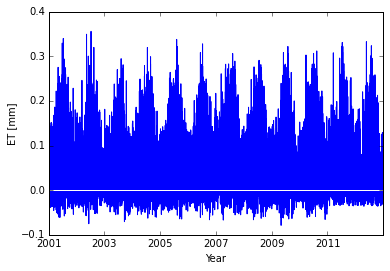

In [26]:
plt.plot(afx.index, afx.tot_ET, 'b-')
plt.xlabel('Year')
plt.ylabel('ET [mm]')
plt.axhline(0, c='w');

### Calculate yearly sums

In [27]:
afx2 = afx.groupby(lambda x: x.year).sum() # compute yearly sums

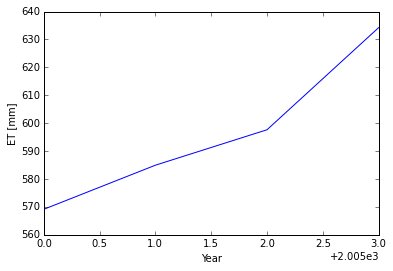

In [28]:
plt.plot(afx2.ix['2005':'2008'].index, afx2.ix['2005':'2008'].tot_ET, 'b-')
plt.ylabel('ET [mm]')
plt.xlabel('Year')
plt.show()

### Calculate Weekly sums

In [29]:
afx3 = afx.resample('W', how='sum') 

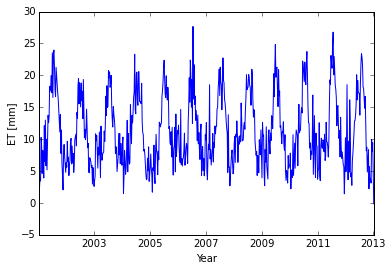

In [30]:
plt.plot(afx3.index, afx3.tot_ET, 'b-')
plt.ylabel('ET [mm]')
plt.xlabel('Year')
plt.show()

In [31]:
afx3.describe()

,YEAR,GAP,DTIME,DOY,HRMIN,UST,TA,WD,WS,NEE,...,RE,GPP,CO2top,CO2height,APAR,PARdif,APARpct,ZL,ET,tot_ET
count,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,...,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000
mean,673262.698565,-4.700159,61610.246411,61445.971292,390904.880383,-5909.620477,780.274102,80425.958396,1599.432687,-222.133888,...,-2348449.148325,-2348449.148325,-2038351.643381,7214.124402,-2348449.148325,-2348449.148325,-2348449.148325,-9236.629955,0.006259,11.265856
std,23096.565484,29.180709,34840.066765,34839.782639,13399.378119,101168.410318,2699.703828,7662.090579,613.914230,406.717090,...,80499.783222,80499.783222,1315787.909928,247.284661,80499.783222,80499.783222,80499.783222,108651.736033,0.003021,5.438144
min,96576.000000,-336.000000,1508.500000,1344.000000,55920.000000,-2399699.004000,-5727.070000,9962.061000,82.993000,-1419.254000,...,-2351664.000000,-2351664.000000,-3359664.000000,1032.000000,-2351664.000000,-2351664.000000,-2351664.000000,-2399764.288000,-0.000076,-0.137030
25%,673104.000000,0.000000,31580.500000,31416.000000,391440.000000,158.261500,-1489.713000,76189.690500,1132.511500,-567.912500,...,-2351664.000000,-2351664.000000,-3359664.000000,7224.000000,-2351664.000000,-2351664.000000,-2351664.000000,0.538500,0.003894,7.009493
50%,674016.000000,0.000000,61652.500000,61488.000000,391440.000000,217.465000,611.580000,81109.862000,1416.027000,-6.413000,...,-2351664.000000,-2351664.000000,-1748652.640000,7224.000000,-2351664.000000,-2351664.000000,-2351664.000000,47.533000,0.005790,10.421215
75%,675096.000000,0.000000,91556.500000,91392.000000,391440.000000,318.578500,3186.160000,85402.207500,2006.184500,125.471000,...,-2351664.000000,-2351664.000000,-1148029.975000,7224.000000,-2351664.000000,-2351664.000000,-2351664.000000,171.324000,0.008477,15.258872
max,676032.000000,0.000000,121796.500000,121632.000000,391440.000000,615.298000,5760.513000,98152.170000,3747.604000,266.891000,...,-335952.000000,-335952.000000,133597.380000,7224.000000,-335952.000000,-335952.000000,-335952.000000,5488.671000,0.015372,27.670299


### Daily Sums

In [32]:
afx4 = afx.resample('D', how='sum')

In [33]:
afx4.describe()

,YEAR,GAP,DTIME,DOY,HRMIN,UST,TA,WD,WS,NEE,...,RE,GPP,CO2top,CO2height,APAR,PARdif,APARpct,ZL,ET,tot_ET
count,4383.000000,4383.000000,4383.00000,4383.00000,4383,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,...,4383,4383,4383.000000,4383,4383,4383,4383,4383.000000,4383.000000,4383.000000
mean,96312.049281,-0.672371,8813.51232,8790.01232,55920,-845.387187,111.620320,11505.150790,228.803170,-31.776853,...,-335952,-335952,-291591.713530,1032,-335952,-335952,-335952,-1321.324888,0.000895,1.611611
std,165.722179,4.764071,5061.63230,5061.63230,0,18742.618753,420.890321,2058.369158,132.520029,64.433225,...,0,0,196801.286838,0,0,0,0,24350.864743,0.000561,1.009074
min,96048.000000,-48.000000,71.50000,48.00000,55920,-479952.000000,-1419.130000,2114.370000,24.152000,-256.843000,...,-335952,-335952,-479952.000000,1032,-335952,-335952,-335952,-479952.000000,-0.000076,-0.137030
25%,96192.000000,0.000000,4439.50000,4416.00000,55920,18.037000,-210.802500,10205.185000,136.369000,-80.630500,...,-335952,-335952,-479952.000000,1032,-335952,-335952,-335952,-0.315000,0.000410,0.737457
50%,96336.000000,0.000000,8807.50000,8784.00000,55920,27.861000,105.294000,11917.840000,180.545000,2.866000,...,-335952,-335952,-251385.650000,1032,-335952,-335952,-335952,2.946000,0.000808,1.454100
75%,96456.000000,0.000000,13175.50000,13152.00000,55920,47.552500,481.725000,13088.425500,291.270000,19.360000,...,-335952,-335952,-178807.530000,1032,-335952,-335952,-335952,20.702500,0.001323,2.381321
max,96576.000000,0.000000,17591.50000,17568.00000,55920,127.910000,942.870000,15892.040000,873.751000,147.103000,...,-335952,-335952,19336.720000,1032,-335952,-335952,-335952,4020.281000,0.003119,5.613506


## Plot Discharge and ET on the same plot

In [37]:
wx = pd.read_pickle('/RHESSys/Comocreek/barnhatb/clim/niwot_snotel.pcl')
wx.describe()

,swe,precip_accum,ATmax,ATmin,ATave,precip
count,12321.000000,12321.000000,9034.000000,9034.000000,9034.000000,12321.000000
mean,4.278865,15.432278,9.502558,-4.235635,1.834243,0.002224
std,5.060075,10.555857,9.993307,7.470492,7.996622,0.004892
min,0.000000,0.000000,-22.777778,-47.777778,-25.000000,0.000000
25%,0.000000,6.000000,1.666667,-9.444444,-3.888889,0.000000
50%,1.900000,14.500000,9.444444,-3.333333,1.666667,0.000000
75%,7.800000,24.500000,17.777778,1.111111,8.333333,0.002540
max,21.100000,41.700000,46.666667,13.888889,19.444444,0.076200


In [38]:
wx3 = wx.resample('W', how='sum')

In [39]:
pylab.rcParams['figure.figsize'] = (22.0, 11.0)

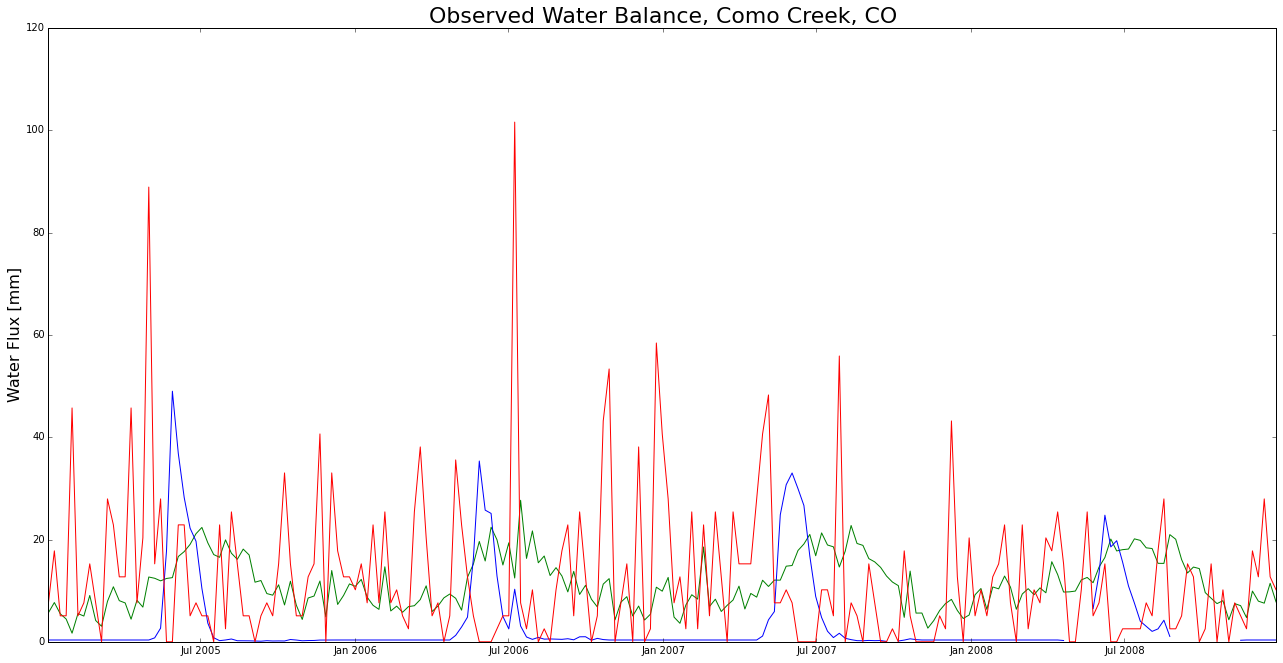

In [40]:
plt.plot(afx3.ix['2005':'2008'].index, afx3.ix['2005':'2008'].tot_ET, 'g-',
         obs3.ix['2005':'2008'].index, obs3.ix['2005':'2008'].discharge, 'b-',
         wx3.ix['2005':'2008'].index, wx3.ix['2005':'2008'].precip*1000., 'r-'
         )
plt.title('Observed Water Balance, Como Creek, CO', fontsize = 22)
plt.ylabel('Water Flux [mm]', fontsize = 16)

### Compute water balance closure

In [41]:
anom = (wx3.ix['2005':'2008'].precip*1000)-(afx3.ix['2005':'2008'].tot_ET+obs3.ix['2005':'2008'].discharge)

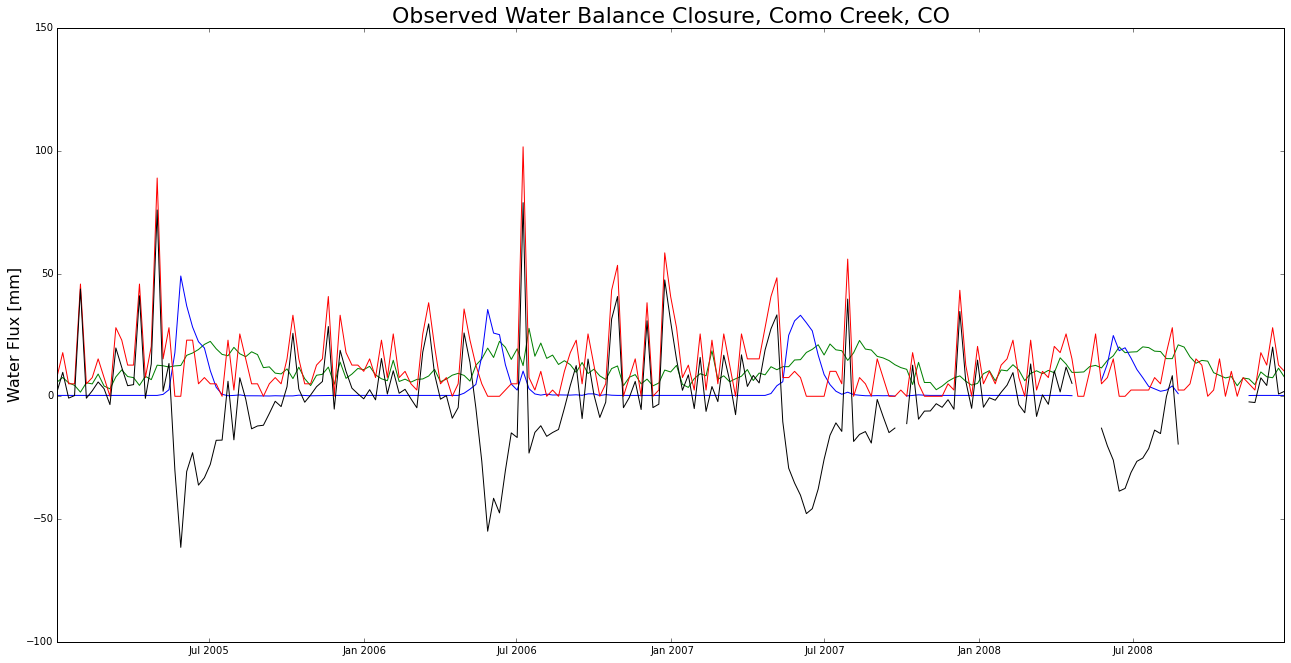

In [42]:
plt.plot(afx3.ix['2005':'2008'].index, afx3.ix['2005':'2008'].tot_ET, 'g-',
         obs3.ix['2005':'2008'].index, obs3.ix['2005':'2008'].discharge, 'b-',
         wx3.ix['2005':'2008'].index, wx3.ix['2005':'2008'].precip*1000., 'r-',
         wx3.ix['2005':'2008'].index, anom, 'k-'
         )
plt.title('Observed Water Balance Closure, Como Creek, CO', fontsize = 22)
plt.ylabel('Water Flux [mm]', fontsize = 16)

In [43]:
anom.sum()/4

-94.505033700752108

## Loop through each model run and calculate an objective function

In [44]:
from hydro import objective_fxns as ofx
pylab.rcParams['figure.figsize'] = (22.0, 11.0)

In [45]:
path = '/RHESSys/Comocreek/barnhatb/out/cal/'+prefx
files = glob.glob(path+'*'+'_basin.daily')

area = 45069.*(10.*10.) #m^2 area of the RHESSys simulation domain

In [46]:
from matplotlib.backends.backend_pdf import PdfPages
import datetime

In [61]:
n = len(files)

objectivefxn = np.zeros([n,1]) # preallocate
dischargeyrs = np.zeros([n,4]) # preallocate
strt = '2004-10-01'
nd = '2012-09-30'


with PdfPages('/RHESSys/Comocreek/barnhatb/figures/'+prefx+'daily_strmflow_plots.pdf') as pdf:
    for fl in files:
    
        data = pd.read_table(fl,delim_whitespace=True,
                       header='infer', parse_dates={'foo':[2,1,0]}, index_col='foo') # bring in the data
        num = int(fl.split('_')[-2]) # pull out the run number, this will be used to index the objective function result into the objectivefxn matix

        ## convert mm/d to m3/s

        #streamflow = data.streamflow/(10*100) # convert to m/d
        #streamflow = streamflow*area # convert to m3/day
        #data['discharge'] = streamflow/(24*60*60) # convert to m3/s

        #plt.plot_date(data.index, data.streamflow, 'k-')

        #del streamflow

        data2 = data.groupby(lambda x: x.year).sum() # compute yearly sums

        simtrain = data.streamflow[strt:nd]

        #dischargeyrs[num,:] = simtrain

        objectivefxn[num] = ofx.nashsut(obstrain,simtrain)

        ## plot each time series as a multi page PDF
    
    
        plt.figure(figsize = (8,5))
        plt.plot(data[strt:nd].index, data[strt:nd].streamflow, 'b-',
                 obs[strt:nd].index, obs[strt:nd].discharge, 'k-')
        
        plt.title('Simulation '+str(num)+' Streamflow Time Series', fontsize = 20)
        plt.xlabel('Date', fontsize = 16)
        plt.ylabel('Discharge [mm]', fontsize = 16)
        
        plt.axis([strt,nd,0,60])
        plt.legend(['Simulated','Observed'])
        
        pdf.savefig()
        plt.close()
        
    d = pdf.infodict()
    d['Title'] = prefx+' RHESSys Model Run Discharge Results'
    d['Author'] = 'Theodore Barnhart'
    d['CreationDate'] = datetime.datetime(2014, 7, 24)
    d['ModDate'] = datetime.datetime.today()

    #print num
    #print objectivefxn[num]
    #print data2.streamflow[2004]
    
    #print fl
    
    #del data2
    #del data


In [49]:
gw1

array(0.27)

ok, this looks better. now create a figure of this. 

Upon examining the PDF of plots the simulations appears to be over generating a bunch of runoff. Its in the same order of magnitude as the observed discharge, but it is still much greater....

In [50]:
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (22.0, 11.0)

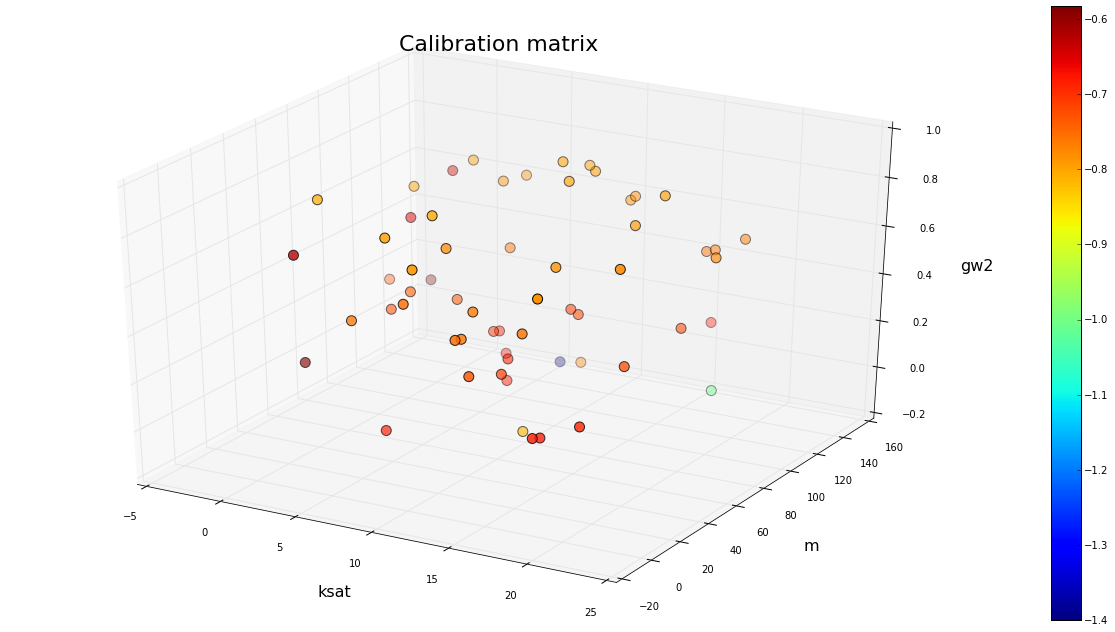

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
#ax = Axes3D(fig)
p = ax.scatter(m,ksat,gw2, zdir = 'z', s = 100, c = objectivefxn)

#plt.scatter(gw1,gw2,s = 100, c=objectivefxn)

ax.set_xlabel('ksat', fontsize = 16)
ax.set_ylabel('m', fontsize = 16)
ax.set_zlabel('gw2', fontsize = 16)

fig.colorbar(p)
plt.title('Calibration matrix', fontsize = 22)


In [52]:
ind = np.where(objectivefxn == objectivefxn.max())
ind = ind[0]

In [53]:
objectivefxn[ind]

array([[-0.58274985]])

In [54]:
m[ind]

array([ 0.98])

In [55]:
ksat[ind]

array([ 107.29])

In [56]:
gw2[ind]

array([ 0.28])

In [57]:
gw1

array(0.27)

In [58]:
files[ind]

'/RHESSys/Comocreek/barnhatb/out/cal/cal4_tower_11_basin.daily'

looks like simulation 54 is the best, but lets check this with a log transformed NSE metric.

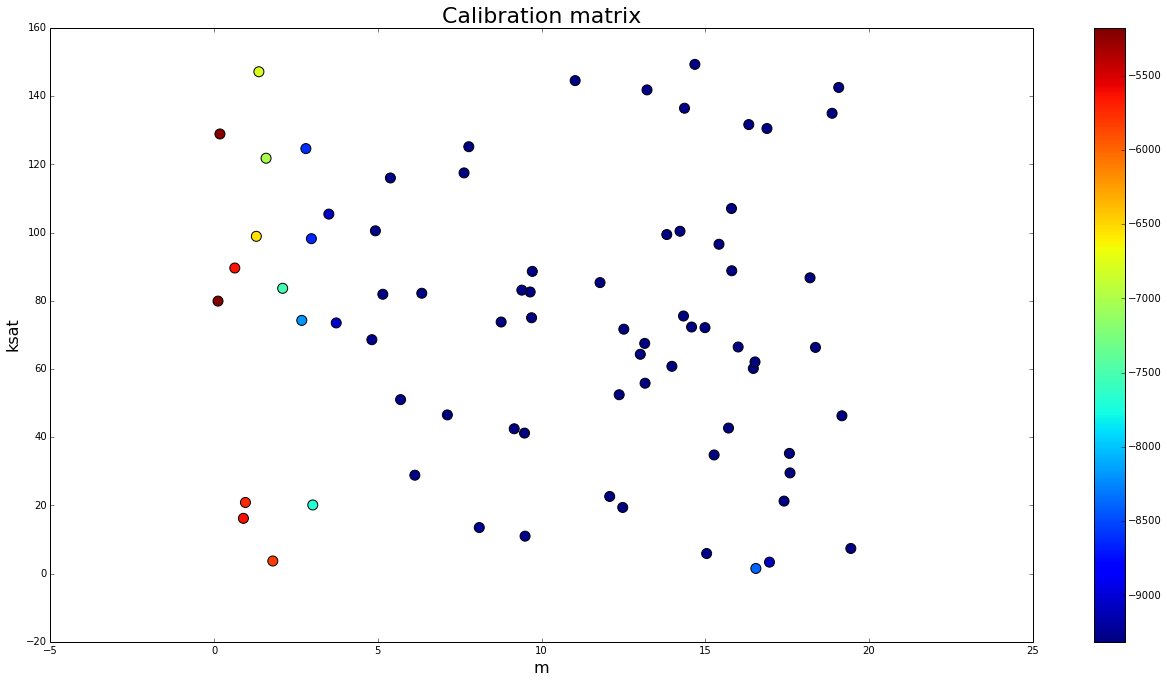

In [60]:
plt.scatter(m,ksat,s = 100, c=objectivefxn)
plt.xlabel('m', fontsize = 16)
plt.ylabel('ksat', fontsize = 16)
plt.colorbar()
plt.title('Calibration matrix', fontsize = 22)

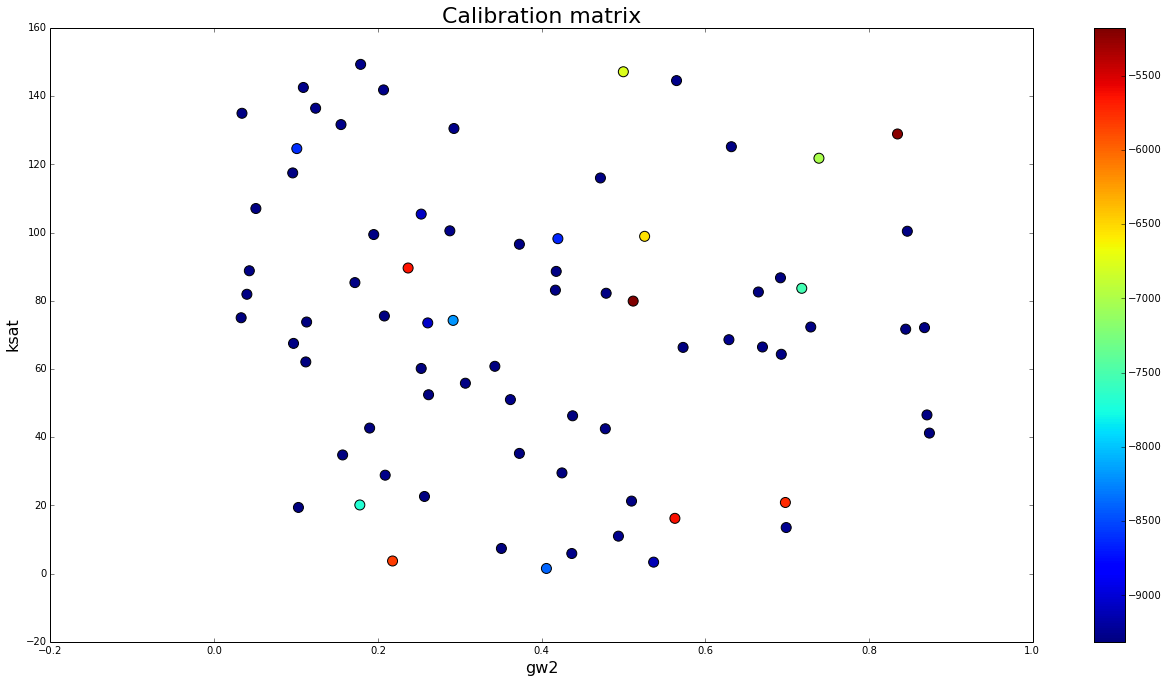

In [61]:
plt.scatter(gw2,ksat,s = 100, c=objectivefxn)
plt.xlabel('gw2', fontsize = 16)
plt.ylabel('ksat', fontsize = 16)
plt.colorbar()
plt.title('Calibration matrix', fontsize = 22)

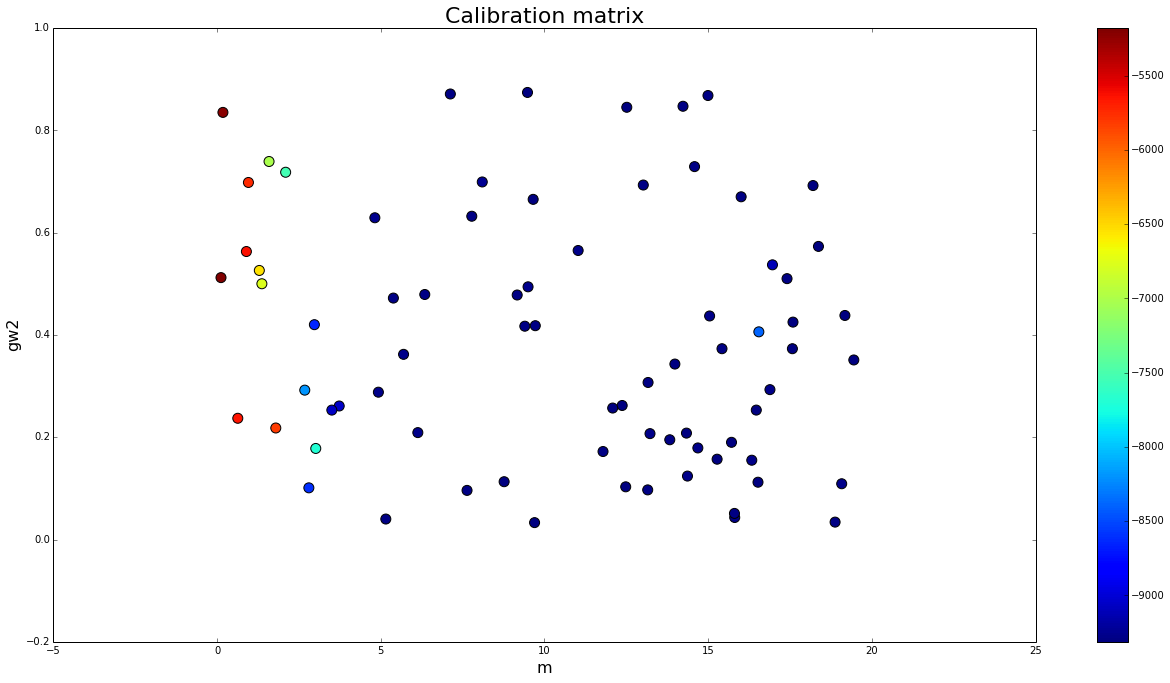

In [62]:
plt.scatter(m,gw2,s = 100, c=objectivefxn)
plt.xlabel('m', fontsize = 16)
plt.ylabel('gw2', fontsize = 16)
plt.colorbar()
plt.title('Calibration matrix', fontsize = 22)

# Compare Hydrographs

In [ ]:
plt.plot()

# Log Transformed NSE

In [25]:
obs3 = np.log(obs)

obs4 = obs3.groupby(lambda x: x.year).sum() # generate yearly sums

obstrain = obs2.discharge[[2004,2005,2007,2009,2011]] # pull out the training years of observations

In [26]:
objectivefxn = np.zeros([len(files),1]) # preallocate
dischargeyrs = np.zeros([len(files),5]) # preallocate

for fl in files:
    data = pd.read_table(fl,delim_whitespace=True,
                   header='infer', parse_dates={'foo':[2,1,0]}, index_col='foo') # bring in the data
    num = int(fl.split('_')[1]) # pull out the run number, this will be used to index the objective function result into the objectivefxn matix
    
    ## convert mm/d to m3/s
    
    #streamflow = data.streamflow/(10*100) # convert to m/d
    #streamflow = streamflow*area # convert to m3/day
    #data['discharge'] = streamflow/(24*60*60) # convert to m3/s
    
    #plt.plot_date(data.index, data.streamflow, 'k-')
    
    #del streamflow
    data = np.log(data) # log transform
    data2 = data.groupby(lambda x: x.year).sum() # compute yearly sums
    
    simtrain = data2.streamflow[[2004,2005,2007,2009,2011]]
    
    dischargeyrs[num,:] = simtrain
    
    objectivefxn[num] = ofx.nashsut(obstrain,simtrain)

#    print num
#    print objectivefxn[num]
#    print data2.streamflow[2004]
    
#    print fl
    
#    del data2
#    del data


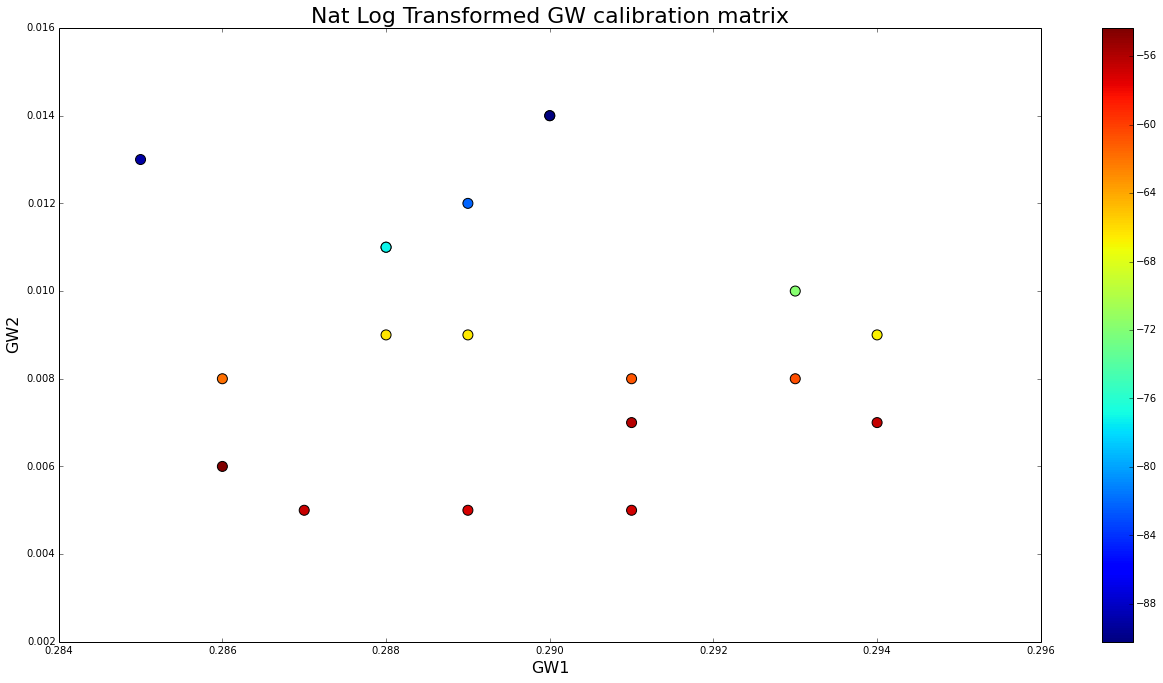

In [27]:
plt.scatter(gw1,gw2,s = 100, c=objectivefxn)
plt.ylabel('GW2', fontsize = 16)
plt.xlabel('GW1', fontsize = 16)
plt.colorbar()
plt.title('Nat Log Transformed GW calibration matrix', fontsize = 22)

In [28]:
ind = np.where(objectivefxn == objectivefxn.max())
ind = ind[0]

In [29]:
objectivefxn[ind]

array([[-54.35395535]])

In [30]:
gw1[ind]

array([ 0.286])

In [31]:
gw2[ind]

array([ 0.006])

In [32]:
files[ind]

'./Comocreek/barnhatb/out/cal/cal6_3_basin.daily'

Same result as the non-log transformed data. 

Because the parameter set selected is at the edge of the parameter space simulated over, conduct another set of simulations honing in on the area.